In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
import math

/run/user/1000/app/org.jupyter.JupyterLab/ipykernel_618/3350823801.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
#the start and end date
start_date = dt.datetime(2015,4,1)
end_date = dt.datetime(2021,4,1)

#loading from yahoo finance
data = yf.download("GLD",start_date, end_date)

pd.set_option('display.max_rows', 4)
pd.set_option('display.max_columns',5)
print(data)


[*********************100%%**********************]  1 of 1 completed

                  Open        High  ...   Adj Close    Volume
Date                                ...                      
2015-04-01  114.559998  115.989998  ...  115.599998   7324000
2015-04-02  115.470001  115.720001  ...  115.279999   3884100
...                ...         ...  ...         ...       ...
2021-03-30  157.940002  158.199997  ...  157.570007   8353200
2021-03-31  158.059998  160.679993  ...  159.960007  10623800

[1511 rows x 6 columns]


In [35]:

# Setting 80 percent data for training
training_data_len = math.ceil(len(data) * .8)
training_data_len 
 
#Splitting the dataset
train_data = data[:training_data_len]['Adj Close'] 
test_data = data[training_data_len:]['Adj Close']
print(train_data.shape, test_data.shape)


(1209,) (302,)


In [37]:
# Selecting Open Price values
dataset_train = train_data.values 
# Reshaping 1D to 2D array
dataset_train = np.reshape(dataset_train, (-1,1)) 
dataset_train.shape


(1209, 1)

In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
# scaling dataset
scaled_train = scaler.fit_transform(dataset_train)

print(scaled_train[:5])
print(test_data)

[[0.3180956 ]
 [0.31135451]
 [0.34105755]
 [0.32883927]
 [0.31535709]]
Date
2020-01-21    146.740005
2020-01-22    146.789993
                 ...    
2021-03-30    157.570007
2021-03-31    159.960007
Name: Adj Close, Length: 302, dtype: float64


In [42]:
# Selecting Open Price values
dataset_test = test_data.values 
# Reshaping 1D to 2D array
dataset_test = np.reshape(dataset_test, (-1,1)) 
# Normalizing values between 0 and 1
scaled_test = scaler.fit_transform(dataset_test) 
print(*scaled_test[:5])


[0.1557746] [0.15666963] [0.16257835] [0.17797675] [0.19606107]


In [43]:
X_train = []
y_train = []

seq = 50
for i in range(seq, len(scaled_train)):
	X_train.append(scaled_train[i-seq:i, 0])
	y_train.append(scaled_train[i, 0])
	if i <= seq+1:
		print(X_train)
		print(y_train)
		print()


[array([0.3180956 , 0.31135451, 0.34105755, 0.32883927, 0.31535709,
       0.29850427, 0.32589005, 0.30840529, 0.2936592 , 0.31451443,
       0.30608802, 0.3180956 , 0.29955763, 0.31346107, 0.28080896,
       0.29829373, 0.26437756, 0.31240787, 0.3334738 , 0.31619974,
       0.27322521, 0.26500951, 0.2864967 , 0.29323779, 0.29197388,
       0.27217185, 0.28375818, 0.27448912, 0.2949231 , 0.33810833,
       0.35137982, 0.35875286, 0.35854216, 0.32420474, 0.32820732,
       0.31999162, 0.3180956 , 0.28249428, 0.28207287, 0.28481138,
       0.2864967 , 0.28439013, 0.29408045, 0.27680638, 0.25995357,
       0.24731404, 0.25426584, 0.25953232, 0.2797556 , 0.26880139])]
[0.2681694339494065]

[array([0.3180956 , 0.31135451, 0.34105755, 0.32883927, 0.31535709,
       0.29850427, 0.32589005, 0.30840529, 0.2936592 , 0.31451443,
       0.30608802, 0.3180956 , 0.29955763, 0.31346107, 0.28080896,
       0.29829373, 0.26437756, 0.31240787, 0.3334738 , 0.31619974,
       0.27322521, 0.26500951, 0.286

In [44]:
X_test = []
y_test = []
for i in range(seq, len(scaled_test)):
	X_test.append(scaled_test[i-seq:i, 0])
	y_test.append(scaled_test[i, 0])


In [45]:
# The data is converted to Numpy array
X_train, y_train = np.array(X_train), np.array(y_train)

#Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))
print("X_train :",X_train.shape,"y_train :",y_train.shape)

# The data is converted to numpy array
X_test, y_test = np.array(X_test), np.array(y_test)

#Reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
y_test = np.reshape(y_test, (y_test.shape[0],1))
print("X_test :",X_test.shape,"y_test :",y_test.shape)


X_train : (1159, 50, 1) y_train : (1159, 1)
X_test : (252, 50, 1) y_test : (252, 1)


In [46]:
# importing libraries
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout
from keras.layers import GRU, Bidirectional
from keras.optimizers import SGD
from sklearn import metrics
from sklearn.metrics import mean_squared_error


In [47]:
# initializing the RNN
regressor = Sequential()

# adding RNN layers and dropout regularization
regressor.add(SimpleRNN(units = 50, 
						activation = "tanh",
						return_sequences = True,
						input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(SimpleRNN(units = 50, 
						activation = "tanh",
						return_sequences = True))

regressor.add(SimpleRNN(units = 50,
						activation = "tanh",
						return_sequences = True))

regressor.add( SimpleRNN(units = 50))

# adding the output layer
regressor.add(Dense(units = 1,activation='sigmoid'))

# compiling RNN
regressor.compile(optimizer = SGD(learning_rate=0.01,
								decay=1e-6, 
								momentum=0.9, 
								nesterov=True), 
				loss = "mean_squared_error")

# fitting the model
regressor.fit(X_train, y_train, epochs = 4, batch_size = 2)
regressor.summary()


Epoch 1/4


/home/tea/.var/app/org.jupyter.JupyterLab/config/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/home/tea/.var/app/org.jupyter.JupyterLab/config/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/keras/src/optimizers/base_optimizer.py:34: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


580/580 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - loss: 0.0168
Epoch 2/4
580/580 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - loss: 0.0024
Epoch 3/4
580/580 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - loss: 0.0023
Epoch 4/4
580/580 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - loss: 0.0018


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_8 (SimpleRNN)        │ (None, 50, 50)         │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 50, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_9 (SimpleRNN)        │ (None, 50, 50)         │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_10 (SimpleRNN)       │ (None, 50, 50)         │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_11 (SimpleRNN)       │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 35,604 (139.08 KB)

 Trainable params: 17,801 (69.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,803 (69.55 KB)

In [25]:
#Initialising the model
regressorLSTM = Sequential()

#Adding LSTM layers
regressorLSTM.add(LSTM(50, 
					return_sequences = True, 
					input_shape = (X_train.shape[1],1)))
regressorLSTM.add(LSTM(50, 
					return_sequences = False))
regressorLSTM.add(Dense(25))

#Adding the output layer
regressorLSTM.add(Dense(1))

#Compiling the model
regressorLSTM.compile(optimizer = 'adam',
					loss = 'mean_squared_error',
					metrics = ["accuracy"])

#Fitting the model
regressorLSTM.fit(X_train, 
				y_train, 
				batch_size = 1, 
				epochs = 4)
regressorLSTM.summary()


Epoch 1/4
1159/1159 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.0014 - loss: 0.0070
Epoch 2/4
1159/1159 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.0020 - loss: 0.0016
Epoch 3/4
1159/1159 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 6.1053e-04 - loss: 7.9235e-04
Epoch 4/4
1159/1159 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.0045 - loss: 8.1027e-04


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 50, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 95,705 (373.85 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 63,804 (249.24 KB)

In [26]:
#Initialising the model
regressorGRU = Sequential()

# GRU layers with Dropout regularisation
regressorGRU.add(GRU(units=50, 
					return_sequences=True,
					input_shape=(X_train.shape[1],1),
					activation='tanh'))
regressorGRU.add(Dropout(0.2))

regressorGRU.add(GRU(units=50, 
					return_sequences=True,
					activation='tanh'))

regressorGRU.add(GRU(units=50, 
					return_sequences=True,
					activation='tanh'))

regressorGRU.add(GRU(units=50, 
					activation='tanh'))

# The output layer
regressorGRU.add(Dense(units=1,
					activation='relu'))
# Compiling the RNN
regressorGRU.compile(optimizer=SGD(learning_rate=0.01, 
								decay=1e-7, 
								momentum=0.9, 
								nesterov=False),
					loss='mean_squared_error')

# Fitting the data
regressorGRU.fit(X_train,y_train,epochs=4,batch_size=1)
regressorGRU.summary()


Epoch 1/4
1159/1159 ━━━━━━━━━━━━━━━━━━━━ 23s 18ms/step - loss: 0.0137
Epoch 2/4
1159/1159 ━━━━━━━━━━━━━━━━━━━━ 22s 19ms/step - loss: 0.0031
Epoch 3/4
1159/1159 ━━━━━━━━━━━━━━━━━━━━ 22s 19ms/step - loss: 0.0025
Epoch 4/4
1159/1159 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - loss: 0.0021


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_4 (GRU)                     │ (None, 50, 50)         │         7,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 50, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_5 (GRU)                     │ (None, 50, 50)         │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_6 (GRU)                     │ (None, 50, 50)         │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_7 (GRU)                     │ (None, 50)             │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 107,804 (421.11 KB)

 Trainable params: 53,901 (210.55 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 53,903 (210.56 KB)

In [27]:
# predictions with X_test data
y_RNN = regressor.predict(X_test)
y_LSTM = regressorLSTM.predict(X_test)
y_GRU = regressorGRU.predict(X_test)

# scaling back from 0-1 to original
y_RNN_O = scaler.inverse_transform(y_RNN) 
y_LSTM_O = scaler.inverse_transform(y_LSTM) 
y_GRU_O = scaler.inverse_transform(y_GRU)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


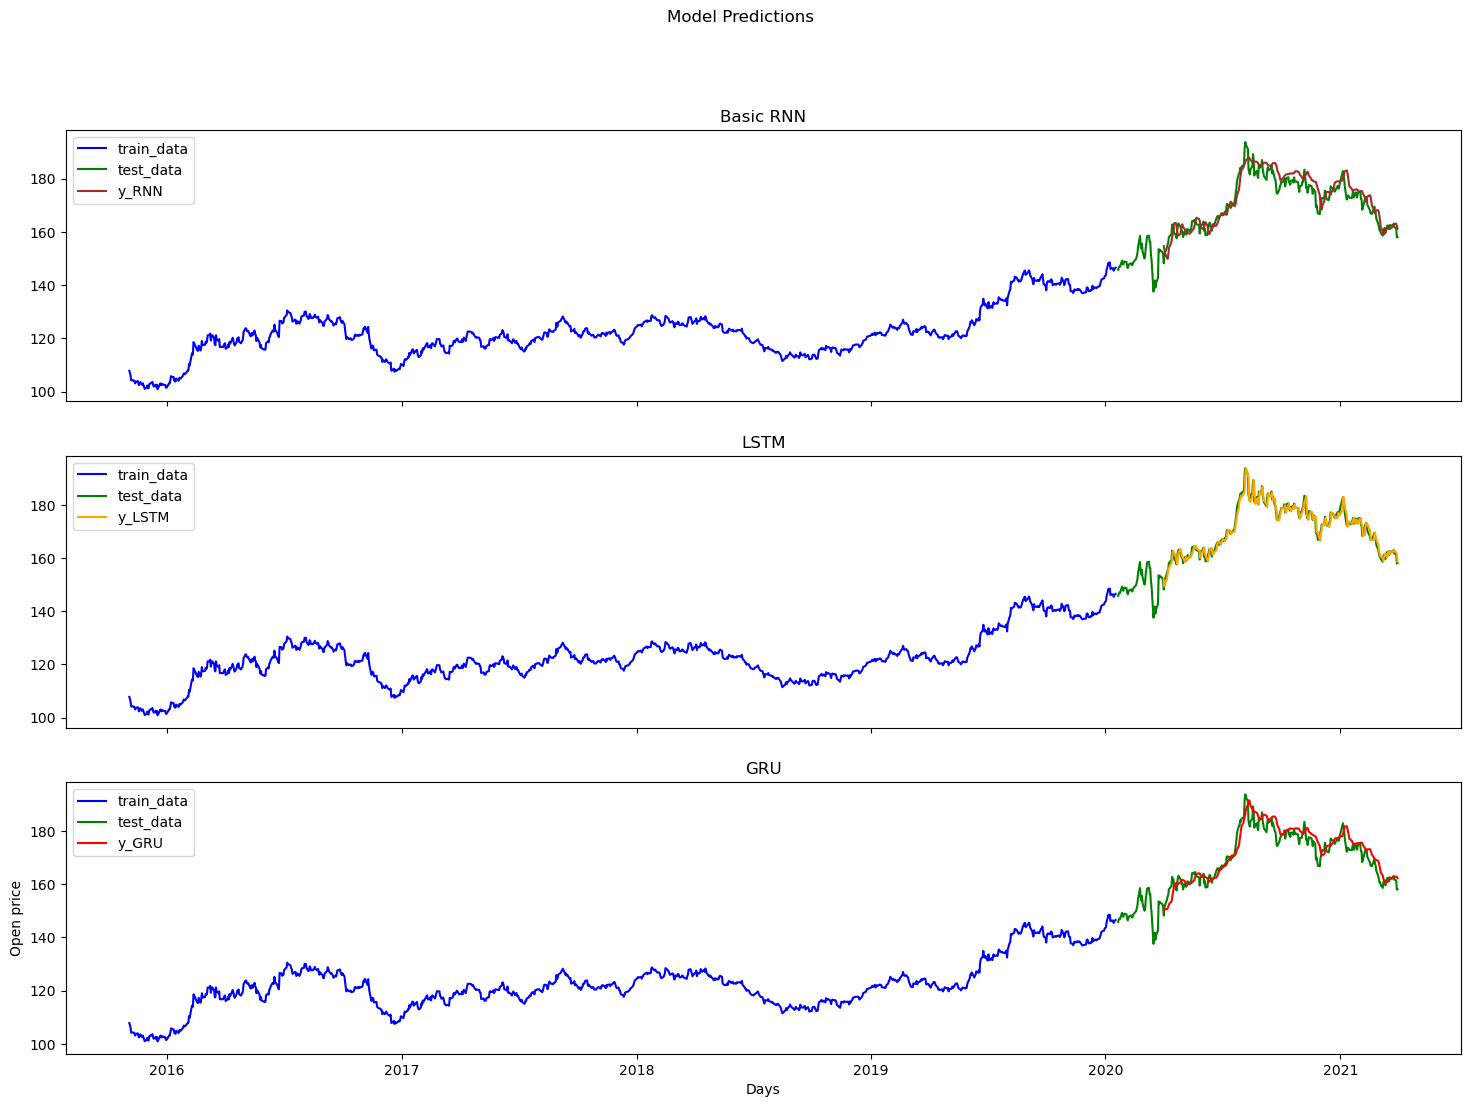

In [28]:
fig, axs = plt.subplots(3,figsize =(18,12),sharex=True, sharey=True)
fig.suptitle('Model Predictions')

#Plot for RNN predictions
axs[0].plot(train_data.index[150:], train_data.Open[150:], label = "train_data", color = "b")
axs[0].plot(test_data.index, test_data.Open, label = "test_data", color = "g")
axs[0].plot(test_data.index[50:], y_RNN_O, label = "y_RNN", color = "brown")
axs[0].legend()
axs[0].title.set_text("Basic RNN")

#Plot for LSTM predictions
axs[1].plot(train_data.index[150:], train_data.Open[150:], label = "train_data", color = "b")
axs[1].plot(test_data.index, test_data.Open, label = "test_data", color = "g")
axs[1].plot(test_data.index[50:], y_LSTM_O, label = "y_LSTM", color = "orange")
axs[1].legend()
axs[1].title.set_text("LSTM")

#Plot for GRU predictions
axs[2].plot(train_data.index[150:], train_data.Open[150:], label = "train_data", color = "b")
axs[2].plot(test_data.index, test_data.Open, label = "test_data", color = "g")
axs[2].plot(test_data.index[50:], y_GRU_O, label = "y_GRU", color = "red")
axs[2].legend()
axs[2].title.set_text("GRU")

plt.xlabel("Days")
plt.ylabel("Open price")

plt.show()
